#<a href="https://www.kaggle.com/competitions/tabular-playground-series-sep-2022/data">Tabular Playground Series - Sep 2022</a>

_В этом задании вы будете прогнозировать годовой объем продаж 4 товаров из двух конкурирующих магазинов, расположенных в шести разных странах. Этот набор данных является полностью вымышленным, но он содержит множество эффектов, которые вы видите в реальных данных, например эффект выходных и праздников, сезонность и т. д. Перед вами стоит сложная задача прогнозирования продаж книг в 2021 году._

In [ ]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sergeylazarevich","key":"859c9f7c80ea53aad29828f931d9c2e4"}'}

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Copy the stackoverflow data set locally.
!kaggle competitions download -c tabular-playground-series-sep-2022

  0% 0.00/615k [00:00<?, ?B/s]
100% 615k/615k [00:00<00:00, 82.8MB/s]


In [ ]:
!unzip tabular-playground-series-sep-2022.zip

Archive:  tabular-playground-series-sep-2022.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Загрузка данных в Data Frame
#### Описание файлов
- train.csv - тренировочные данные
- test.csv - тестовые данные
- sample_submission.csv - образец файла для отправки в правильном формате
#### Описание признаков данных
- row_id:    
- date: дата      
- country: страна  
- store: магазин     
- product: продукт    
- num_sold: количество продаж  



In [ ]:
#добавим праздничные дни в разных странах
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import holidays
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
matplotlib.rcParams.update({'font.size': 14})

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio
pio.renderers.default = "colab"

In [ ]:
# Импортируем данные train.csv в pandas Dataframe
df_train = pd.read_csv('train.csv', sep=',')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    70128 non-null  int64 
 1   date      70128 non-null  object
 2   country   70128 non-null  object
 3   store     70128 non-null  object
 4   product   70128 non-null  object
 5   num_sold  70128 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ MB


In [ ]:
df_train.head()

row_id        date  country       store                           product  \
0       0  2017-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques   
1       1  2017-01-01  Belgium  KaggleMart            Kaggle Getting Started   
2       2  2017-01-01  Belgium  KaggleMart                Kaggle Recipe Book   
3       3  2017-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose   
4       4  2017-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques   

   num_sold  
0       663  
1       615  
2       480  
3       710  
4       240

In [ ]:
df_train = df_train.loc[pd.to_datetime(df_train['date']) >= pd.to_datetime('2020-01-01')]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17568 entries, 52560 to 70127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    17568 non-null  int64 
 1   date      17568 non-null  object
 2   country   17568 non-null  object
 3   store     17568 non-null  object
 4   product   17568 non-null  object
 5   num_sold  17568 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 960.8+ KB


In [ ]:
df_test = pd.read_csv('test.csv', sep=',')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   row_id   17520 non-null  int64 
 1   date     17520 non-null  object
 2   country  17520 non-null  object
 3   store    17520 non-null  object
 4   product  17520 non-null  object
dtypes: int64(1), object(4)
memory usage: 684.5+ KB


In [ ]:
df_test.iloc[:5]

row_id        date  country       store                           product
0   70128  2021-01-01  Belgium  KaggleMart        Kaggle Advanced Techniques
1   70129  2021-01-01  Belgium  KaggleMart            Kaggle Getting Started
2   70130  2021-01-01  Belgium  KaggleMart                Kaggle Recipe Book
3   70131  2021-01-01  Belgium  KaggleMart  Kaggle for Kids: One Smart Goose
4   70132  2021-01-01  Belgium  KaggleRama        Kaggle Advanced Techniques

## Рассмотрим поближе каждую характеристику 

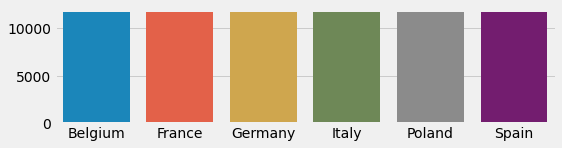


Количество пропущенных элементов 0
Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

Количество уникальных элементов 6


In [ ]:
index = 'country'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

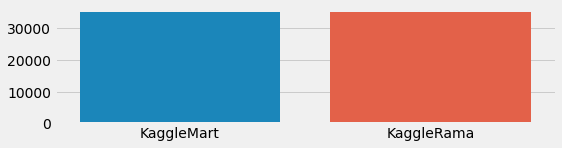


Количество пропущенных элементов 0
KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

Количество уникальных элементов 2


In [ ]:
index = 'store'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

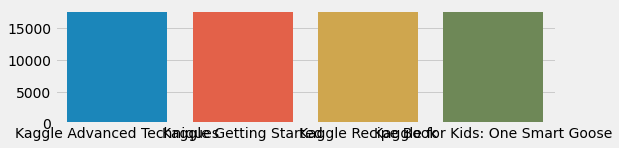


Количество пропущенных элементов 0
Kaggle Advanced Techniques          17532
Kaggle Getting Started              17532
Kaggle Recipe Book                  17532
Kaggle for Kids: One Smart Goose    17532
Name: product, dtype: int64

Количество уникальных элементов 4


In [ ]:
index = 'product'
df_train[index] = df_train[index].astype(str)
counts = df_train[index].value_counts()
plt.figure(figsize=(8, 2))
sns.barplot(counts.index, counts.values)
plt.show()

print(f'\nКоличество пропущенных элементов {df_train[index].isnull().sum()}')
print(df_train[index].value_counts())
print(f'\nКоличество уникальных элементов {df_train[index].value_counts().size}')

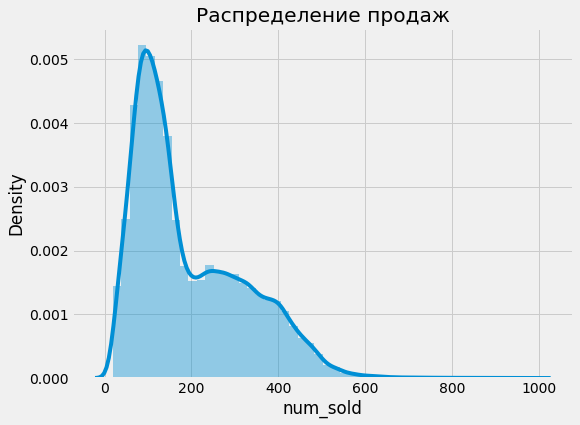

In [ ]:
plt.figure(figsize = (8, 6))
sns.distplot(df_train['num_sold'])
plt.title('Распределение продаж')
plt.show()

## Обработка фич

In [ ]:
#fig = px.line(df_train, x="date", y="num_sold", template='plotly_dark')
#fig.update_layout(
#    title={
#        'text': "Количество заказов",
#        'y':0.95,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show() 

In [ ]:
# График заказов по продуктам
group = df_train[['date', 'product', 'num_sold']].groupby(['date', 'product']).sum().reset_index()
#group = group.pivot(index='date', columns='product', values='num_sold').reset_index()
#fig = px.line(group, x="date", y="num_sold", color='product', template='plotly_dark')
#fig.update_layout(
#    title={
#        'text': "Количество заказов",
#        'y':0.95,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show() 

In [ ]:
# График заказов по продуктам
group = df_train[['date', 'product', 'num_sold']].groupby(['date', 'product']).sum().reset_index()
group_country = group[['date', 'num_sold']].groupby(['date']).sum().reset_index()
group= group.merge(group_country, on='date', how='left').rename(columns={'num_sold_x': 'num_sold_product', 'num_sold_y': 'num_sold_country'})
group['ratio'] = group['num_sold_product'] / group['num_sold_country']*100
#fig = px.line(group, x="date", y='ratio', color='product', template='plotly_dark')
#fig.update_layout(
#    title={
#        'text': "Количество заказов",
#        'y':0.95,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show() 

In [ ]:
# График заказов по странам
group = df_train[['date', 'country', 'num_sold']].groupby(['date', 'country']).sum().reset_index()
#group = group.pivot(index='date', columns='product', values='num_sold').reset_index()
#fig = px.line(group, x="date", y="num_sold", color='country', template='plotly_dark')
#fig.update_layout(
#    title={
#        'text': "Количество заказов",
#        'y':0.95,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show() 

In [ ]:
for country in df_train['country'].unique():

    group = df_train.loc[df_train['country'] == country]

    group_product = group[['date', 'product', 'num_sold']].groupby(['date', 'product']).sum().reset_index()

    #fig = px.line(group_product, x='date', y='num_sold', color='product', template='plotly_dark')
    #fig.update_layout(
#    title={
#        'text': "Количество заказов",
#        'y':0.95,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show() 

In [ ]:
for country in df_train['country'].unique():

    group = df_train.loc[df_train['country'] == country]

    group_country = group[['date', 'num_sold']].groupby(['date']).sum().reset_index()

    group_product = group[['date', 'product', 'num_sold']].groupby(['date', 'product']).sum().reset_index()
    group_product = group_product.merge(group_country, on='date', how='left').rename(columns={'num_sold_x': 'num_sold_product', 'num_sold_y': 'num_sold_country'})

    group_product['ratio'] = group_product['num_sold_product'] / group_product['num_sold_country']*100

#    fig = px.line(group_product, x='date', y='ratio', color='product', template='plotly_dark')
    #fig.update_layout(
#    title={
#        'text': "Количество заказов",
#        'y':0.95,
#        'x':0.5,
#        'xanchor': 'center',
#        'yanchor': 'top'})
#fig.show() 

In [ ]:
df_train['country'].unique()

array(['Belgium', 'France', 'Germany', 'Italy', 'Poland', 'Spain'],
      dtype=object)

In [ ]:
df_train['product'].unique()

array(['Kaggle Advanced Techniques', 'Kaggle Getting Started',
       'Kaggle Recipe Book', 'Kaggle for Kids: One Smart Goose'],
      dtype=object)

In [ ]:
# Функции Графиков заказов по странам
n = 0
m = -1
start = pd.to_datetime('2017-01-01') 
group = df_train.iloc[n:m]#df_train.loc[(df_train['country'] == country)]
group_country = group[['date', 'num_sold']].groupby(['date']).sum().reset_index()
#group_country['period_day'] = (pd.to_datetime(group_country['date'].iloc[0])- start).dt.days
group_product = group[['date', 'product', 'num_sold']].groupby(['date', 'product']).sum().reset_index()
group_product = group_product.merge(group_country, on='date', how='left').rename(columns={'num_sold_x': 'num_sold_product', 'num_sold_y': 'num_sold_country'})
group_product['ratio'] = group_product['num_sold_product'] / group_product['num_sold_country']

day = (pd.to_datetime(group_product['date'])- start).dt.days
#start = pd.to_datetime('2017-01-01') 
#day = np.arange((start - pd.to_datetime(group['date'].iloc[0])).days, \
                #(pd.to_datetime(group['date'].iloc[-1])- start).days)
#day = group_product['period_day'] 

group_product['period_Advanced_Techniques'] = 0.29 + 0.0556*np.sin(day * 2*(np.pi/365) - 6.4)
group_product['period_Getting_Started'] = 0.23 - 0.042*np.sin(day * 2*(np.pi/365) + 6.4)
group_product['period_Recipe_Book'] = 0.172 + 0.0176*np.sin(day * 2*(np.pi/365) + 1.66)
group_product['period_One_Smart_Goose'] = 0.31 - 0.012*np.sin(day * 2*(np.pi/365) + 0.7) + 0.01*np.sin(day * (np.pi/365) + 3.5)
list_period = ['period_Advanced_Techniques', 'period_Getting_Started', 'period_Recipe_Book', 'period_One_Smart_Goose', 'ratio']
fig = px.line(group_product, x='date', y= list_period, color='product', template='plotly_dark')
fig.update_layout(
    title={
        'text': "Количество заказов по странам",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
list_period = ['period_Advanced_Techniques', 'period_Getting_Started', 'period_Recipe_Book', 'period_One_Smart_Goose']
fig = px.line(test, x=df_test['date'], y= list_period, template='plotly_dark')#test.index.to_numpy()
fig.update_layout(
    title={
        'text': "Количество заказов по странам",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
class DataPreprocessing():
    def __init__(self):
        self.holidays_dict = {'Belgium': holidays.Belgium(),
                            'Germany': holidays.Germany(),
                            'Italy': holidays.Italy(),
                            'Poland':holidays.Poland(),
                            'Spain': holidays.Spain(),
                            'France': holidays.France()}
        self.start = pd.to_datetime('2017-01-01') 

    def fit(self):
        pass

    def transform(self, df):
        df = df.copy()

        df = df[['date', 'country', 'store', 'num_sold']].groupby(['date', 'country', 'store']).sum().reset_index()
        #праздники
        holidays_list = []
        for i in df[['date','country']].values:
            holidays_list.append(int(pd.to_datetime(i[0]) in self.holidays_dict[i[1]]))
        df['holidays'] = holidays_list
        
        # Распределим покуски в зависимости от времени 
        df['month'] = pd.to_datetime(df['date']).dt.month
        df['day'] = pd.to_datetime(df['date']).dt.day
        df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
        df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear

        #выходные
        is_weekend = [df['dayofweek'] >= 5]
        choices = [1]
        df['is_weekend'] = np.select(is_weekend, choices, default=0)

        # Переведём признаки из категориального в бинарный
        df = pd.get_dummies(df, columns=['country'])
        df = pd.get_dummies(df, columns=['store'])
        #df = pd.get_dummies(df, columns=['product'])

        #рассчитаем сезонность и выведем функцию зависимостей
        #day = (pd.to_datetime(df['date'])- self.start).dt.days

        #df['period_Advanced_Techniques'] = 0.29 + 0.0556*np.sin(day * 2*(np.pi/365) - 6.4)
        #df['period_Getting_Started'] = 0.23 - 0.042*np.sin(day * 2*(np.pi/365) + 6.4)
        #df['period_Recipe_Book'] = 0.172 + 0.0176*np.sin(day * 2*(np.pi/365) + 1.66)
        #df['period_One_Smart_Goose'] = 0.31 - 0.012*np.sin(day * 2*(np.pi/365) + 0.7) + 0.01*np.sin(day * (np.pi/365) + 3.5)

        #df = df.loc[pd.to_datetime(df['date']) >= pd.to_datetime('2020-01-01')]
        #удалим не нужное
        df.drop(['date'], axis=1, inplace=True)

        return df#.set_index('row_id')

In [ ]:
preprocessor = DataPreprocessing()
train = preprocessor.transform(df_train)
#test = preprocessor.transform(df_test)

In [ ]:
train.iloc[:5]

num_sold  holidays  month  day  dayofweek  dayofyear  is_weekend  \
0      1803         1      1    1          2          1           0   
1       637         1      1    1          2          1           0   
2      1582         1      1    1          2          1           0   
3       525         1      1    1          2          1           0   
4      1939         1      1    1          2          1           0   

   country_Belgium  country_France  country_Germany  country_Italy  \
0                1               0                0              0   
1                1               0                0              0   
2                0               1                0              0   
3                0               1                0              0   
4                0               0                1              0   

   country_Poland  country_Spain  store_KaggleMart  store_KaggleRama  
0               0              0                 1                 0  
1               0              0                 0                 1  
2               0              0                 1                 0  
3               0              0                 0                 1  
4               0              0                 1                 0

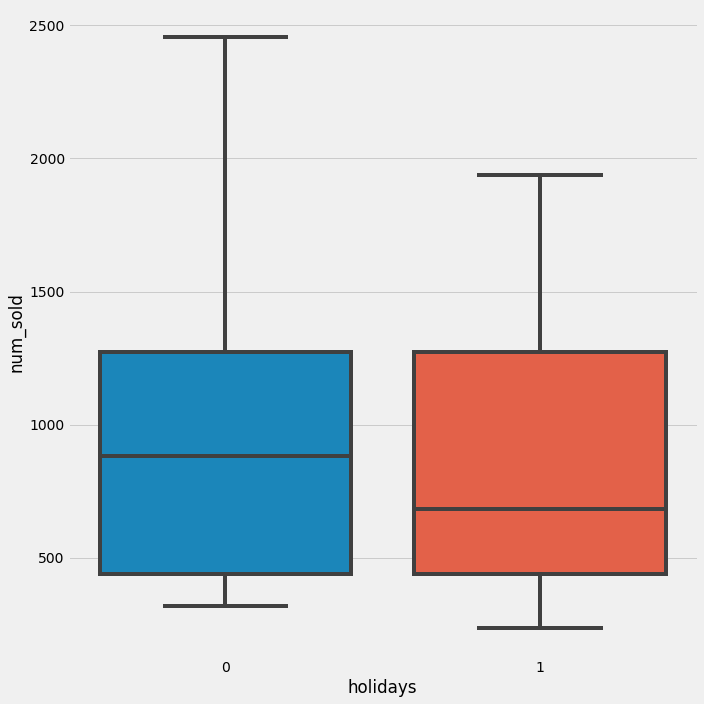

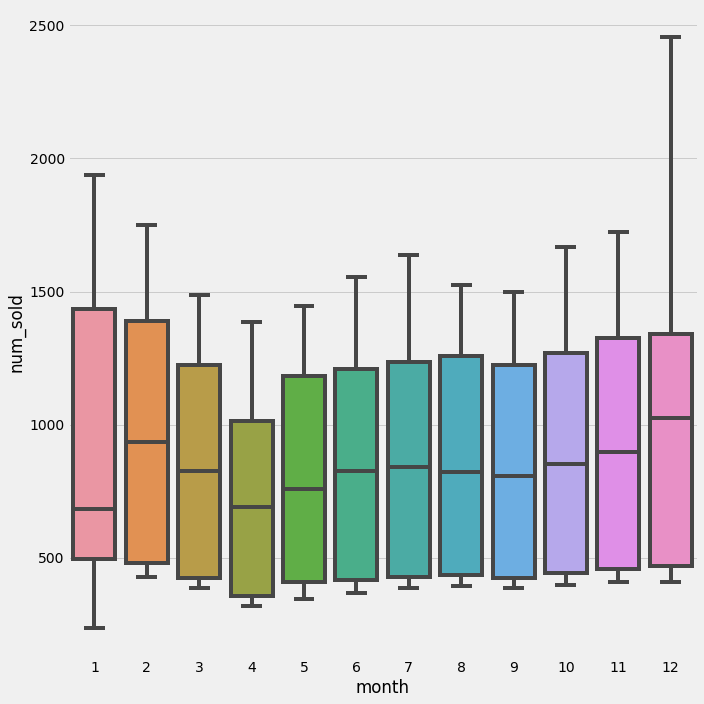

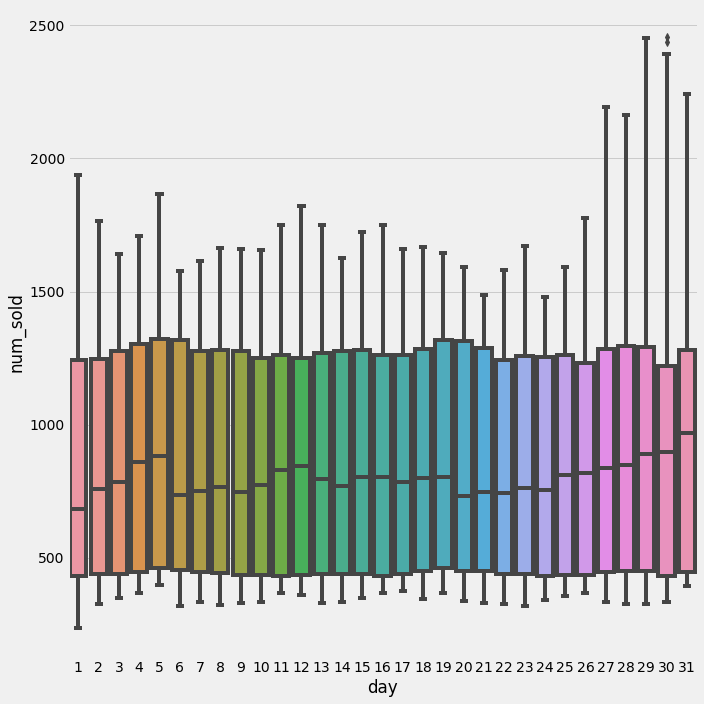

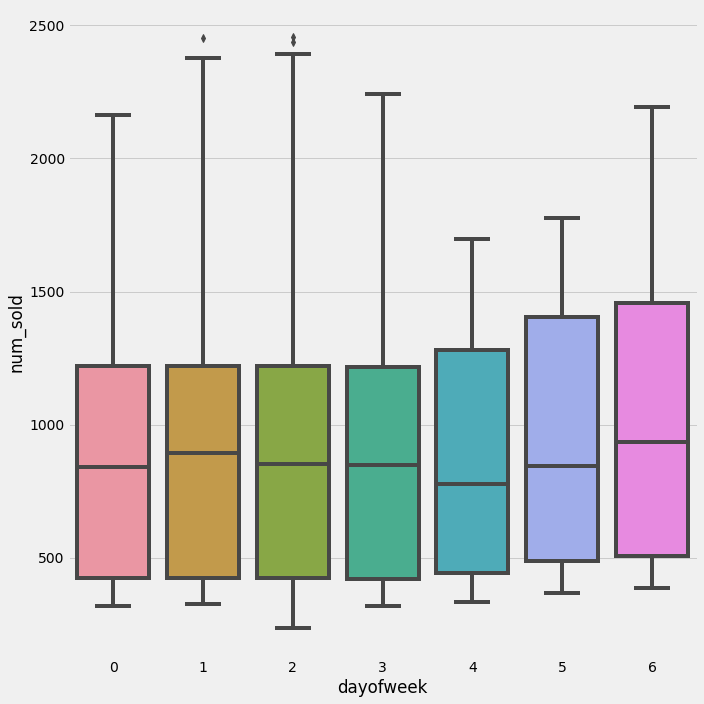

In [ ]:
for i in ["holidays", "month", "day", "dayofweek"]:
    sns.catplot(x=i, y="num_sold", data=train, kind="box", height=10)
    plt.show()

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 93 kB/s 


In [ ]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import train_test_split, cross_val_score
import catboost as catb
from sklearn.model_selection import StratifiedKFold

In [ ]:
def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 6)) + "\n" +
            "Train MAE:\t" + str(round(mae(train_true_values, train_pred_values), 6)) + "\n" +
            "Train MSE:\t" + str(round(mse(train_true_values, train_pred_values), 6))+ "\n" +
            "Train SMAPE:\t" + str(calculate_smape(train_true_values, train_pred_values)) + "%"
          )

    print("\n" +
            "Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 6)) + "\n" +
            "Test MAE:\t" + str(round(mae(test_true_values, test_pred_values), 6)) + "\n" +
            "Test MSE:\t" + str(round(mse(test_true_values, test_pred_values), 6)) + "\n" +
            "Test SMAPE:\t" + str(calculate_smape(test_true_values, test_pred_values)) + "%"
            )
    
    plt.figure(figsize=(15,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

def show_feature_importances(feature_names, feature_importances, get_top=None):
    """Важность признаков"""
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances)))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['num_sold'], axis=1), train['num_sold'], test_size=0.25, shuffle=True, random_state=42)

In [ ]:
frozen_params = {'silent':True,
                 'random_state':42,
                 'eval_metric':'SMAPE',
                 'early_stopping_rounds':100
}

model = catb.CatBoostRegressor(**frozen_params, iterations=10000)#, min_data_in_leaf = 3)
model.fit(X_train, y_train, verbose=False, eval_set=(X_valid, y_valid))#, plot=True)

y_train_preds = model.predict(X_train)
y_valid_preds = model.predict(X_valid)

Train R2:	0.997689
Train MAE:	15.231496
Train MSE:	469.302644
Train SMAPE:	1.78%

Test R2:	0.992776
Test MAE:	22.200959
Test MSE:	1412.947393
Test SMAPE:	2.45%


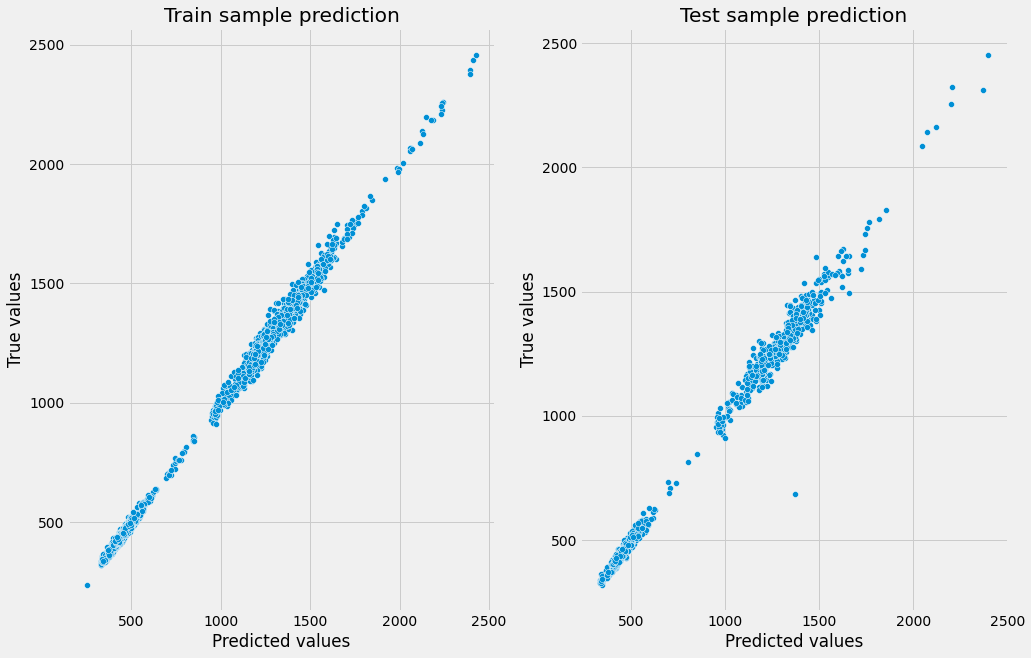

In [ ]:
evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

### Важность признаков

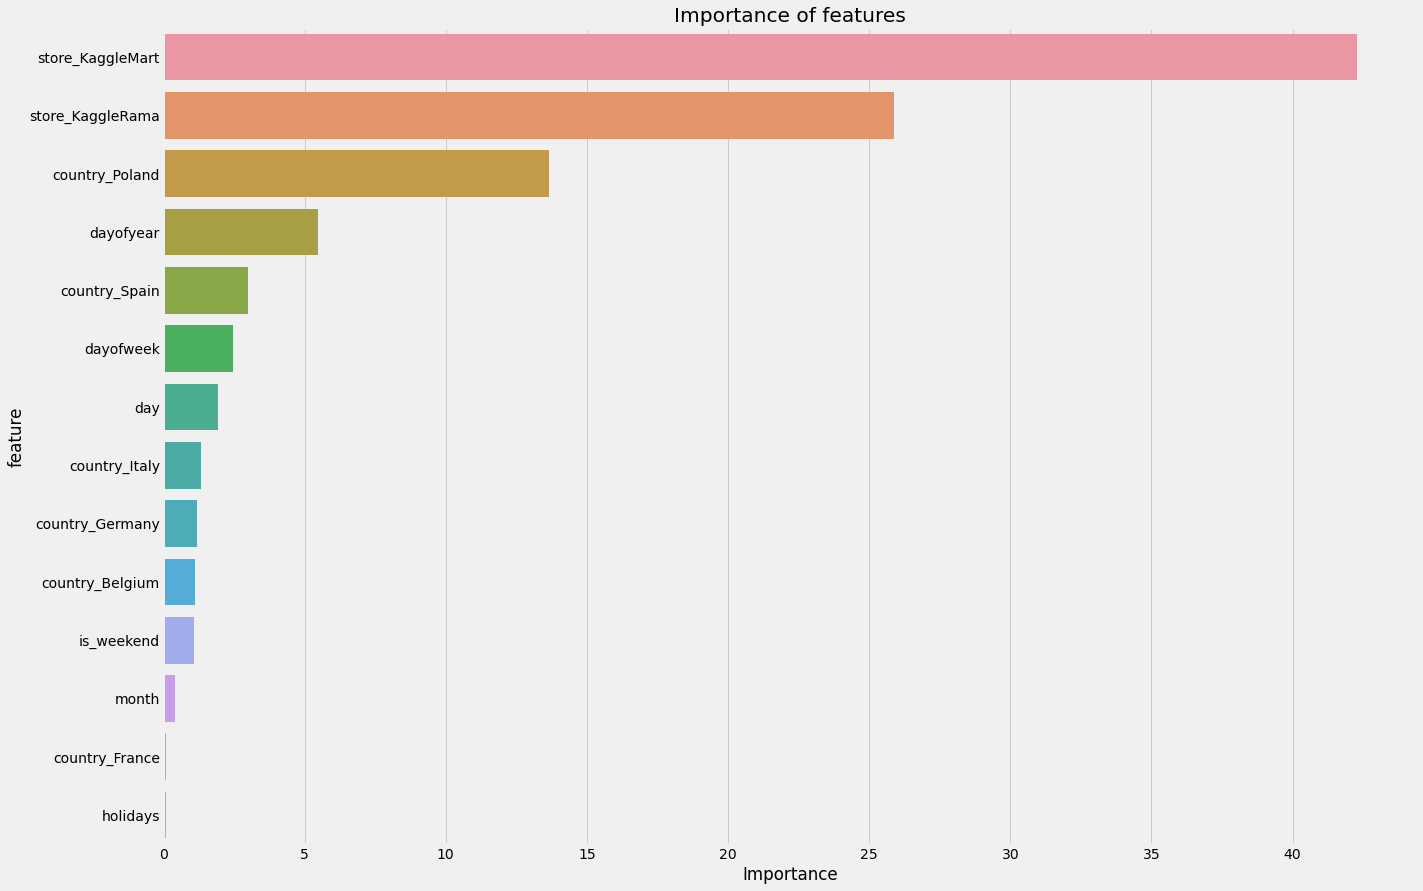

In [ ]:
important_features_top = show_feature_importances(X_train.columns, model.feature_importances_)

In [ ]:
def test_model(df_data, model):
    
    columns =['holidays', 'month', 'day', 'dayofweek', 'dayofyear', 'is_weekend',
            'country_Belgium', 'country_France', 'country_Germany', 'country_Italy',
            'country_Poland', 'country_Spain', 'store_KaggleMart',
            'store_KaggleRama', 'preds']
    df = pd.DataFrame([[0 for _ in range(15)]],columns=columns)
    #праздники
    holidays_dict = {'Belgium': holidays.Belgium(),
                            'Germany': holidays.Germany(),
                            'Italy': holidays.Italy(),
                            'Poland':holidays.Poland(),
                            'Spain': holidays.Spain(),
                            'France': holidays.France()}

    df['holidays'] = int(pd.to_datetime(df_data[['date','country']].values[0]) in holidays_dict[df_data[['date','country']].values[1]])
        
    # Распределим покуски в зависимости от времени 
    df['month'] = pd.to_datetime(df_data['date']).month
    df['day'] = pd.to_datetime(df_data['date']).day
    df['dayofweek'] = pd.to_datetime(df_data['date']).dayofweek
    df['dayofyear'] = pd.to_datetime(df_data['date']).dayofyear

    #выходные
    is_weekend = [df['dayofweek'] >= 5]
    choices = [1]
    df['is_weekend'] = np.select(is_weekend, choices, default=0)

    # Переведём признаки из категориального в бинарный
    if df_data['country'] == 'Belgium':
        df['country_Belgium'] = 1
    elif df_data['country'] == 'France':
        df['country_France'] = 1
    elif df_data['country'] == 'Germany':
        df['country_Germany'] = 1
    elif df_data['country'] == 'Italy':
        df['country_Italy'] = 1
    elif df_data['country'] == 'Poland':
        df['country_Poland'] = 1
    elif df_data['country'] == 'Spain':
        df['country_Spain'] = 1
    
    if df_data['store'] == 'KaggleMart':
        df['store_KaggleMart'] = 1
    if df_data['store'] == 'KaggleRama':
        df['store_KaggleRama'] = 1

    #получим ответ от модели
    predict = model.predict(df)

    day = (pd.to_datetime(df_data['date']) - pd.to_datetime('2017-01-01') ).days

    if df_data['product'] == 'Kaggle Advanced Techniques':
        df['preds'] = (0.29 + 0.0556*np.sin(day * 2*(np.pi/365) - 6.4)) * predict
    elif df_data['product'] == 'Kaggle Getting Started':
        df['preds'] = (0.23 - 0.042*np.sin(day * 2*(np.pi/365) + 6.4)) * predict
    elif df_data['product'] == 'Kaggle Recipe Book':
        df['preds'] = (0.172 + 0.0176*np.sin(day * 2*(np.pi/365) + 1.66)) * predict
    elif df_data['product'] == 'Kaggle for Kids: One Smart Goose':
        df['preds'] =  (0.31 - 0.012*np.sin(day * 2*(np.pi/365) + 0.7) + 0.01*np.sin(day * (np.pi/365) + 3.5)) * predict

    return np.round(df['preds'].values[0], 0)


In [ ]:
preds = []
for i in range(df_train.shape[0]):
    preds.append(test_model(df_train.iloc[i], model))

Train R2:	0.989143
Train MAE:	9.060735
Train MSE:	175.110713
Train SMAPE:	4.17%

Test R2:	0.989143
Test MAE:	9.060735
Test MSE:	175.110713
Test SMAPE:	4.17%


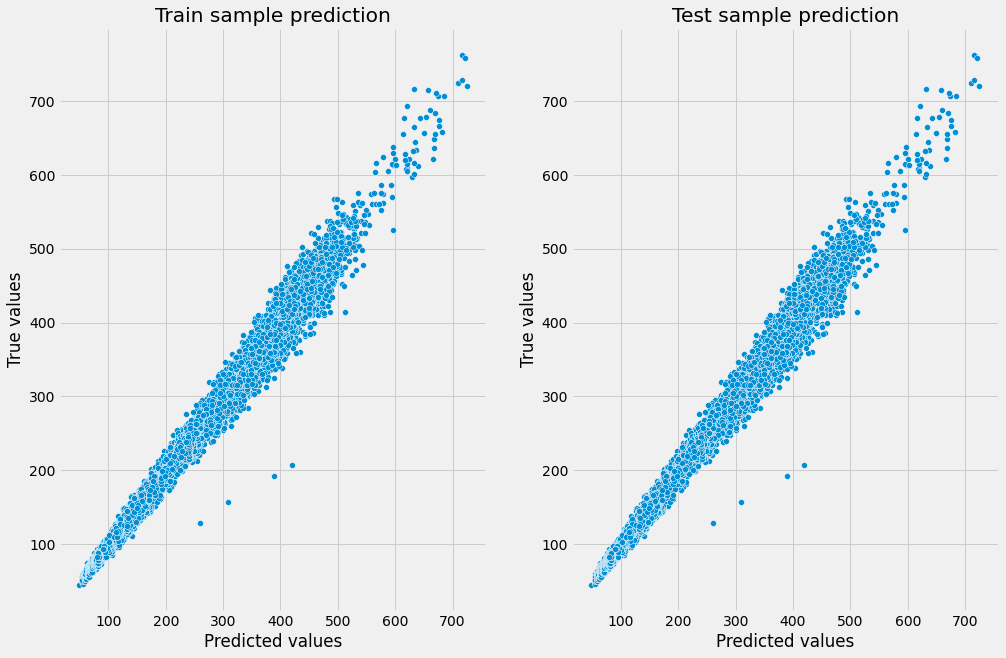

In [ ]:
evaluate_preds(df_train['num_sold'], preds, df_train['num_sold'], preds)

In [ ]:
class DataPreprocessing_2():
    def __init__(self):
        self.holidays_dict = {'Belgium': holidays.Belgium(),
                            'Germany': holidays.Germany(),
                            'Italy': holidays.Italy(),
                            'Poland':holidays.Poland(),
                            'Spain': holidays.Spain(),
                            'France': holidays.France()}
        self.start = pd.to_datetime('2017-01-01') 

    def fit(self):
        pass

    def transform(self, df):
        df = df.copy()
        #праздники
        holidays_list = []
        for i in df[['date','country']].values:
            holidays_list.append(int(pd.to_datetime(i[0]) in self.holidays_dict[i[1]]))
        df['holidays'] = holidays_list
        
        # Распределим покуски в зависимости от времени 
        df['month'] = pd.to_datetime(df['date']).dt.month
        df['day'] = pd.to_datetime(df['date']).dt.day
        df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
        df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear

        #выходные
        is_weekend = [df['dayofweek'] >= 5]
        choices = [1]
        df['is_weekend'] = np.select(is_weekend, choices, default=0)

        # Переведём признаки из категориального в бинарный
        df = pd.get_dummies(df, columns=['country'])
        df = pd.get_dummies(df, columns=['store'])
        df = pd.get_dummies(df, columns=['product'])

        #рассчитаем сезонность и выведем функцию зависимостей
        #day = (pd.to_datetime(df['date'])- self.start).dt.days

        #df['period_Advanced_Techniques'] = 0.29 + 0.0556*np.sin(day * 2*(np.pi/365) - 6.4)
        #df['period_Getting_Started'] = 0.23 - 0.042*np.sin(day * 2*(np.pi/365) + 6.4)
        #df['period_Recipe_Book'] = 0.172 + 0.0176*np.sin(day * 2*(np.pi/365) + 1.66)
        #df['period_One_Smart_Goose'] = 0.31 - 0.012*np.sin(day * 2*(np.pi/365) + 0.7) + 0.01*np.sin(day * (np.pi/365) + 3.5)

        #df = df.loc[pd.to_datetime(df['date']) >= pd.to_datetime('2020-01-01')]
        #удалим не нужное
        df.drop(['date'], axis=1, inplace=True)

        return df.set_index('row_id')

In [ ]:
preprocessor = DataPreprocessing_2()
train = preprocessor.transform(df_train)

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [ ]:
train['preds'] = scaler.fit_transform(np.array(preds).reshape(-1, 1))

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['num_sold'], axis=1), train['num_sold'], test_size=0.25, shuffle=True, random_state=42)

In [ ]:
frozen_params = {'silent':True,
                 'random_state':42,
                 'eval_metric':'SMAPE',
                 'early_stopping_rounds':100
}

model_2 = catb.CatBoostRegressor(**frozen_params, iterations=5000)#, min_data_in_leaf = 3)
model_2.fit(X_train, y_train, verbose=False, eval_set=(X_valid, y_valid))#, plot=True)

y_train_preds = model_2.predict(X_train)
y_valid_preds = model_2.predict(X_valid)

Train R2:	0.991618
Train MAE:	8.230038
Train MSE:	135.976848
Train SMAPE:	3.86%

Test R2:	0.989163
Test MAE:	8.796988
Test MSE:	171.692536
Test SMAPE:	4.08%


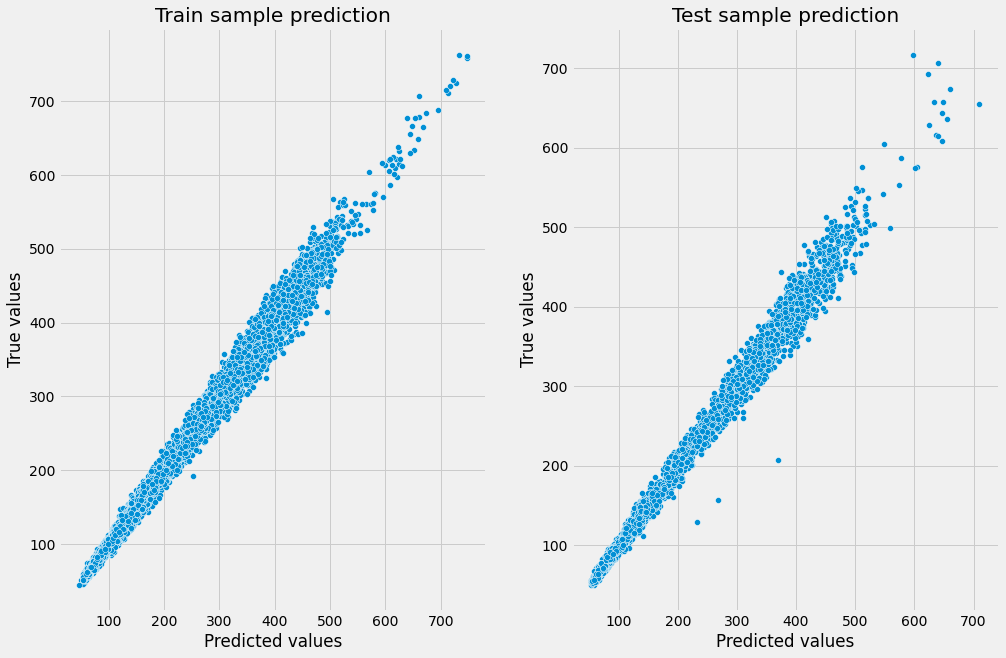

In [ ]:
evaluate_preds(y_train, y_train_preds, y_valid, y_valid_preds)

### Прогнозирование на тестовом датасете

In [ ]:
sumbit_df = pd.read_csv('sample_submission.csv', sep=',')

test_preds = []
for i in range(df_test.shape[0]):
    test_preds.append(test_model(df_test.iloc[i], model))

test = preprocessor.transform(df_test)

test['preds'] = scaler.fit_transform(np.array(test_preds).reshape(-1, 1))

test_preds = model_2.predict(test)


sumbit_df['num_sold'] = np.round(test_preds, 0)
sumbit_df.head()

row_id  num_sold
0   70128     486.0
1   70129     408.0
2   70130     343.0
3   70131     523.0
4   70132     173.0

In [ ]:
sumbit_df.to_csv('sample_submission.csv', index=False)